In [1]:
# Import all necessary libraries.
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, silhouette_samples

In [2]:
# Generating the sample data from make_blobs
N = 1000

x, y = make_blobs(n_samples=N, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)


## Show Training data set

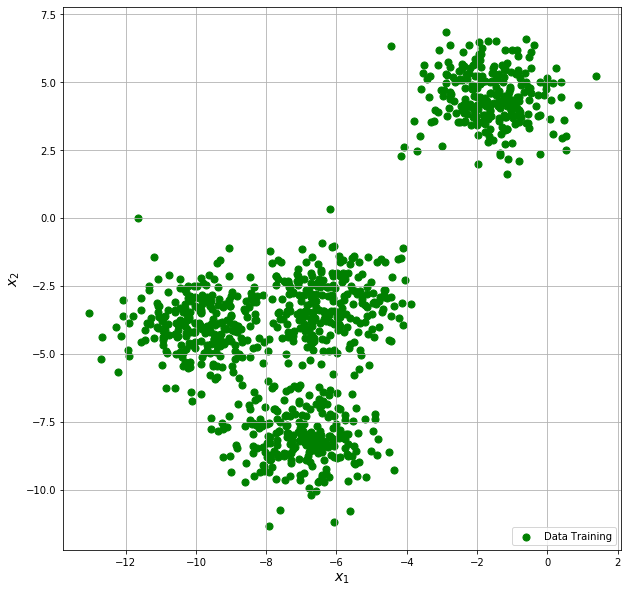

In [3]:
# Data Ploting
fig = plt.figure(figsize=(10,10))
plt.scatter(x[:, 0], x[:,1], s = 50, color = 'green', label = 'Data Training')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Elbow Method

In [4]:
# Within-clusters sum-of-squares - wcss
def calculate_wcss(data):
    wcss = []
    
# Choosing a cluster number to test. For this case is 15
    for n in range(2, 17): 
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)
    return wcss

# Finding the optimal number of Clusters
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 17, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    return distances.index(max(distances)) + 2

## Elbow Method - Best k value

In [5]:
# Calculating the sum of squares for the stipulated number of clusters
Sum_of_squares = calculate_wcss(x)

# Calculating the best amount of clusters
n = optimal_number_of_clusters(Sum_of_squares)

print('Optimal number of clusters:',n)

Optimal number of clusters: 4


## KMeans instance 

In [6]:
# Create an instance of KMeans Cluster 
km = KMeans(n_clusters=n)

## Training Model and print great values

In [7]:
# Train model.
km.fit(x)

# Optimal centroid
for i in range(0, 4):
    print('Centroid %d: (%1.2f, %1.2f)' % (i, km.cluster_centers_[i][0], km.cluster_centers_[i][1]))

Centroid 0: (-6.98, -8.10)
Centroid 1: (-1.61, 4.46)
Centroid 2: (-6.21, -3.15)
Centroid 3: (-9.90, -3.93)


## Iterations to training of model

In [8]:
# Number of iterations required to train the model
print('Number of Iterations:', km.n_iter_)

Number of Iterations: 3


## Show Training data - Cluster and Centroid

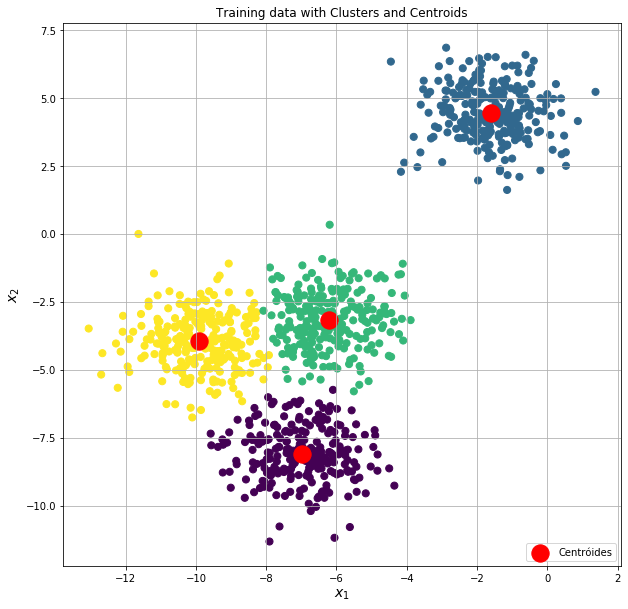

In [9]:
# Data ploting results
fig = plt.figure(figsize=(10,10))
plt.scatter(x[:, 0], x[:,1], s = 50, c = km.labels_)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centróides')
plt.title('Training data with Clusters and Centroids')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Silhouette Method

In [10]:
sil = []
kmax = 16

# Dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(x)
  labels = kmeans.labels_ 
  sil.append(silhouette_score(x, labels, metric = 'euclidean'))

## Silhouette Method - Best k value

In [11]:
print('Optimal number of clusters:\n', sil)

Optimal number of clusters:
 [0.7047494651336347, 0.5837874966810302, 0.6239074614020027, 0.5447751899613077, 0.4252289828480219, 0.3553216082485581, 0.3237201922661533, 0.327439715690864, 0.3344479470598758, 0.3382923458748304, 0.34626508712041054, 0.34617578540060967, 0.3416205443399761, 0.33081640145202995, 0.3315560923234781]


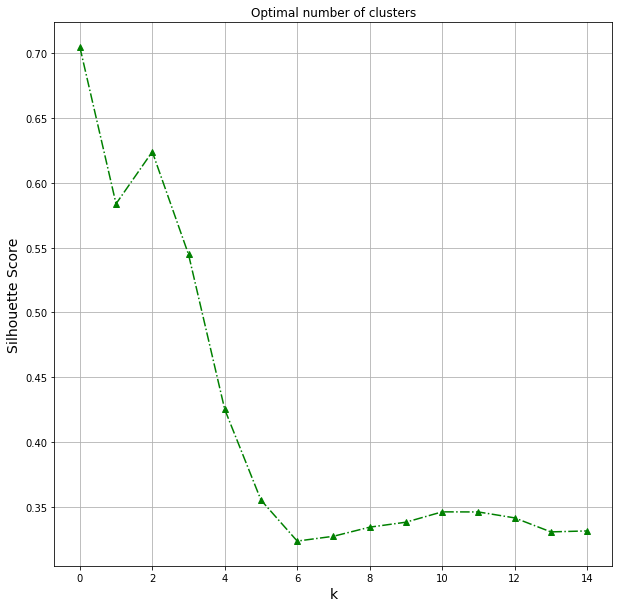

In [12]:
# Data Ploting
fig = plt.figure(figsize=(10,10))
plt.plot( sil,'g^-.')
plt.title('Optimal number of clusters')
plt.xlabel('k', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.grid()
plt.show()

## KMeans instance

In [13]:
# Create an instance of KMeans Cluster 
km = KMeans(n_clusters=2)

## Training Model and print great values

In [14]:
# Train.
km.fit(x)

# Optimal centroid
for i in range(0, 2):
    print('Centroid %d: (%1.2f, %1.2f)' % (i, km.cluster_centers_[i][0], km.cluster_centers_[i][1]))

Centroid 0: (-1.61, 4.46)
Centroid 1: (-7.74, -5.05)


## Iterations to training of model

In [15]:
# Number of iterations required to train the model
print('Number of Iterations:', km.n_iter_)

Number of Iterations: 3


## Show Training data - Cluster and Centroid

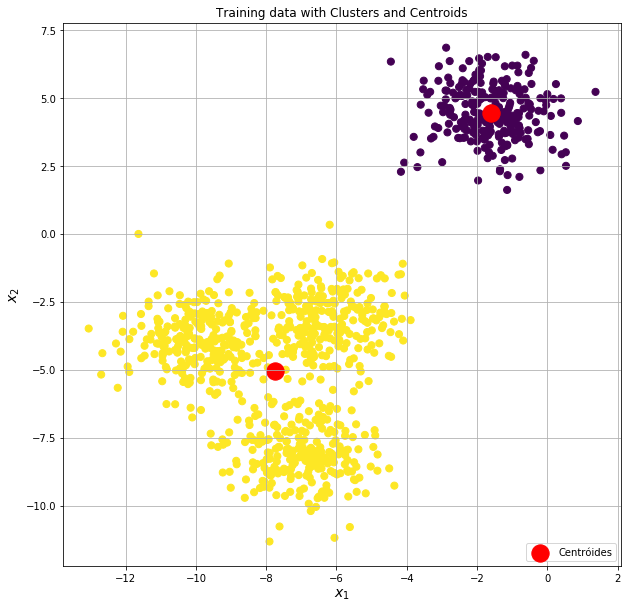

In [16]:
# Data ploting results
fig = plt.figure(figsize=(10,10))
plt.scatter(x[:, 0], x[:,1], s = 50, c = km.labels_)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centróides')
plt.title('Training data with Clusters and Centroids')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.legend(loc="lower right")
plt.grid()
plt.show()